In [46]:
# Global imports
import sys, os
import re
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from collections import Counter, OrderedDict

%matplotlib inline 
#%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
#plt.style.use(['dark_background'])

import numpy as np
import json
import collections
from scipy import stats
import random
import math
from datetime import datetime

# Local import
sys.path.insert(0, '../training/methods/')
# Import the neural network architectures:
from MLP import Net as MLP
from CNN import Net as CNN

sys.path.insert(0, '../training/src/')
from dataset import merger_dataset, splitDataLoader, ToTensor, Normalize

# User-defined parameters

In [47]:
working_dir = "/home/mquesnel/Courses/DeepLearning/"
path_to_models = working_dir+'models/'
path_to_datasets = working_dir+"/datasets/density_transformed/"


dl_arch = 'cnn'
nb_layer = 2
train_val_dataset_size = 1280#134
output_dim = 1
optimizer_name =  "Adam" 
batch_size = 32 
learning_rate = '1e-4' 
nb_epoch = 100
metric = 'mse'
split_train = '90'

test_dataset_size = 90

# Display the training and validation losses

## Read the train/val losses

In [48]:
if dl_arch == 'mlp':
    layer_str = '_2hl_'
elif dl_arch == 'cnn':
    layer_str = '_3cv_'
else:
    raise ValueError("the model name specified is not valid")

model_name = 'model_'+str(train_val_dataset_size)+'cubes_with28_'+str(output_dim)+'targ_'+dl_arch+layer_str+'bs'+str(batch_size)+\
'_lr'+str(learning_rate)+'_'+str(nb_epoch)+'ep_opt'+str(optimizer_name)+'_split'+split_train+'_'+metric#+'_SELU'

metrics_file = path_to_models+model_name+'/metrics.json'

with open(metrics_file) as json_file:
    data = json.load(json_file)

## Plot the losses

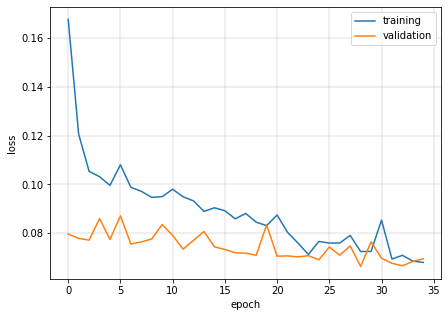

In [49]:
fig = plt.figure(1, figsize=(7,5))
plt.plot(data['train_loss'], label='training')
plt.plot(data['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.grid(linewidth=0.4)

In [50]:
print(np.min(data['train_loss']))
print(np.min(data['val_loss']))

0.06804626135918726
0.06638937191231044


# Load the model

In [51]:
# Load model architecture:
if dl_arch == 'mlp':
    model = MLP(70**3, output_dim)
    layer_str = '_2hl_'
elif dl_arch == 'cnn':
    model = CNN(1, output_dim)
    layer_str = '_3cv_'
else:
    raise ValueError("the model name specified is not valid")

model_file = path_to_models+model_name+'/model.pth'

assert os.path.isfile(model_file), "{} does not exist".format(model_file)
print("Model file name: {}\n".format(model_file))

state_dict = torch.load(model_file, map_location='cpu')

new_state_dict = OrderedDict()

model.load_state_dict(state_dict)

Model file name: /home/mquesnel/Courses/DeepLearning/models/model_1280cubes_with28_1targ_cnn_3cv_bs32_lr1e-4_100ep_optAdam_split90_mse/model.pth



<All keys matched successfully>

# Create the dataset object

We apply the same transformations to the test dataset than to the training/validation set

In [52]:
# Define name of the hdf5 file containing the test data:
test_file = path_to_datasets+"merger_test_"+str(test_dataset_size)+"cubes_no28.h5"

assert os.path.isfile(test_file), "{} does not exist".format(test_file)
print("Test dataset filename: {}".format(test_file))  

transfo = transforms.Compose([Normalize(), ToTensor()])

# Create the dataset object:xc
test_dataset = merger_dataset(path_to_file = test_file, 
                          size = test_dataset_size,
                          transform = transfo)

Test dataset filename: /home/mquesnel/Courses/DeepLearning//datasets/density_transformed/merger_test_90cubes_no28.h5


# Perform predictions

In [53]:
prediction_list = []
ratio_list = []
rmse_list = []
for id in range(test_dataset_size):
    
    sample = test_dataset[id]

    ratio = sample['target'].numpy()
    if output_dim == 1:
        ratio = ratio[0]
    density = sample['input'].unsqueeze(0)

    prediction = model(density).detach().numpy()[0]
    
    prediction_list.append(prediction)
    ratio_list.append(ratio)

In [54]:
print(ratio)

0.5381356


In [55]:
for i in range(test_dataset_size):
    print("id={}".format(i))
    print(prediction_list[i])
    print(ratio_list[i])
    print()

id=0
[0.34087065]
0.15677966

id=1
[0.32924786]
0.15677966

id=2
[0.43594235]
0.15677966

id=3
[0.42827216]
0.15677966

id=4
[0.30176613]
0.15677966

id=5
[0.42815796]
0.15677966

id=6
[0.39992845]
0.15677966

id=7
[0.68010294]
0.15677966

id=8
[0.38511077]
0.15677966

id=9
[0.5554012]
0.41525424

id=10
[0.4749612]
0.41525424

id=11
[0.3939532]
0.41525424

id=12
[0.52753127]
0.41525424

id=13
[0.5927434]
0.41525424

id=14
[0.447746]
0.41525424

id=15
[0.2990576]
0.41525424

id=16
[0.42408952]
0.41525424

id=17
[0.54311687]
0.41525424

id=18
[0.4129675]
0.20762712

id=19
[0.5156837]
0.20762712

id=20
[0.4479364]
0.20762712

id=21
[0.3766271]
0.20762712

id=22
[0.29427916]
0.20762712

id=23
[0.69824696]
0.20762712

id=24
[0.46036127]
0.20762712

id=25
[0.4421493]
0.20762712

id=26
[0.41529232]
0.20762712

id=27
[0.4129612]
0.90677965

id=28
[0.267922]
0.90677965

id=29
[0.3635356]
0.90677965

id=30
[0.39280364]
0.90677965

id=31
[0.40105015]
0.90677965

id=32
[0.39196151]
0.90677965

id=

# Evaluation metrics

In [56]:
pred = np.array(prediction_list)
truth = np.array(ratio_list)

### Compute the MSE

In [57]:
mse = np.mean((pred - truth)**2)
print(mse)

0.13640451


### Compute the RMSE

In [58]:
rmse = np.sqrt(np.mean((pred - truth)**2))
print(rmse)

0.3693298


### Compute the MAE

In [ ]:
mae = np.mean(np.abs(pred - truth))
print(mae)